In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def emptydoor_fun(playerchoice, doorwithcar): #function to open the empty door that was not chosen by the player
    for i in range(3): 
        emptydoor = i
        if emptydoor != playerchoice and emptydoor != doorwithcar: return emptydoor

In [52]:
def changedoor_fun(prevchoice, emptydoor): #function to let the switcher change door having seen the empty one
    for i in range(3):
        newchoice = i
        if newchoice != prevchoice and newchoice != emptydoor: return newchoice

In [53]:
def newcomer_fun(emptydoor): #function to let the newcomer choose between the two remaining doors
    for i in range(3):
        choice = i
        if choice != emptydoor: return choice

In [54]:
#let's play: how many times do you want to try this game?
times = int(input("How many times do you want to play? "))

How many times do you want to play?  3000


In [55]:
conservative = [] #saving the results in list (0=loss, 1=win) for every game
switcher = []
newcomer = []

for i in range(times):
    doors = [0, 0, 0]
    door_with_car = np.random.randint(3) #number of the door with the car
    doors[door_with_car] = 1
        #print(doors)
    
    #first (uninformed) choice of the players
    conservative_pl = np.random.randint(3)
    switcher_pl = np.random.randint(3)
        #print(conservative_pl, switcher_pl)
    
    #i need to open an EMPTY door that has not been picked by the players
    empty_door_cons = emptydoor_fun(conservative_pl, door_with_car)     
    empty_door_switch = emptydoor_fun(switcher_pl, door_with_car)
        #print(empty_door_cons, empty_door_switch)
    
    #the switcher changes door
    switcher_pl = changedoor_fun(switcher_pl, empty_door_switch)
    
    #enter the newcomer, after the switcher
    newcomer_pl = newcomer_fun(empty_door_switch)
        #print(conservative_pl, switcher_pl, newcomer_pl)

    #saving the results of the game
    if doors[conservative_pl] == doors[door_with_car]: conservative.append(1) 
    elif doors[conservative_pl] != doors[door_with_car]: conservative.append(0)

    if doors[switcher_pl] == doors[door_with_car]: switcher.append(1)
    elif doors[switcher_pl] != doors[door_with_car]: switcher.append(0)

    if doors[newcomer_pl] == doors[door_with_car]: newcomer.append(1)
    elif doors[newcomer_pl] != doors[door_with_car]: newcomer.append(0)

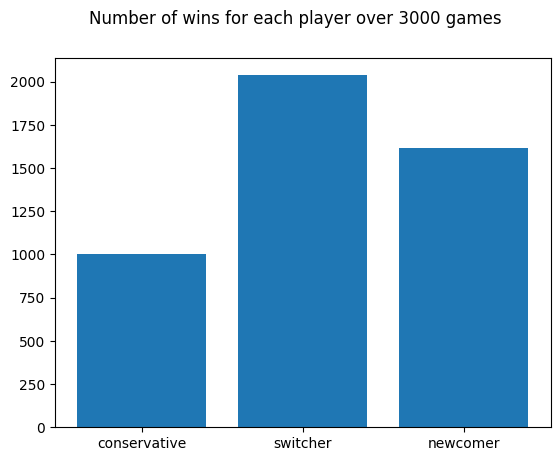

In [58]:
#plot a histogram for the total wins of each player over all games

data = {"conservative": sum(conservative), "switcher": sum(switcher), "newcomer": sum(newcomer)}
players = list(data.keys())
wins = list(data.values())

fig, ax = plt.subplots()
ax.bar(players, wins)
fig.suptitle("Number of wins for each player over " + str(times) + " games")

plt.show()


In [57]:
#announce the winner

#if doors[conservative_pl] == doors[door_with_car]: print("The winner is the conservative player!")

#if doors[switcher_pl] == doors[door_with_car]: print("The winner is the switcher player!")

#if doors[newcomer_pl] == doors[door_with_car]: print("The winner is the new comer!")